In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# print(os.listdir("../input"))

In [2]:
data = pd.read_csv(r"C:\Users\vasu5\Downloads\customer_segmentation\Mall_Customers.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# First 5 rows of our data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.drop(["CustomerID"], axis = 1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
from sklearn.model_selection import train_test_split
df,new_data = train_test_split(data,test_size=0.2)

In [11]:
df.shape

(160, 4)

In [12]:
df.describe

<bound method NDFrame.describe of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
118       0   51                  67                      43
33        1   18                  33                      92
100       0   23                  62                      41
186       0   54                 101                      24
52        0   31                  43                      54
..      ...  ...                 ...                     ...
115       0   19                  65                      50
164       1   50                  85                      26
158       1   34                  78                       1
64        1   63                  48                      51
9         0   30                  19                      72

[160 rows x 4 columns]>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 118 to 9
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  160 non-null    int32
 1   Age                     160 non-null    int64
 2   Annual Income (k$)      160 non-null    int64
 3   Spending Score (1-100)  160 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [130]:
new_data.shape

(40, 4)

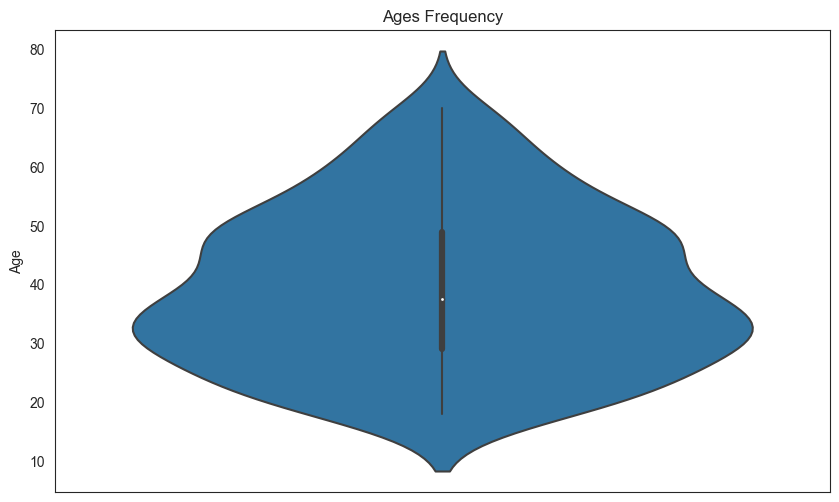

In [131]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

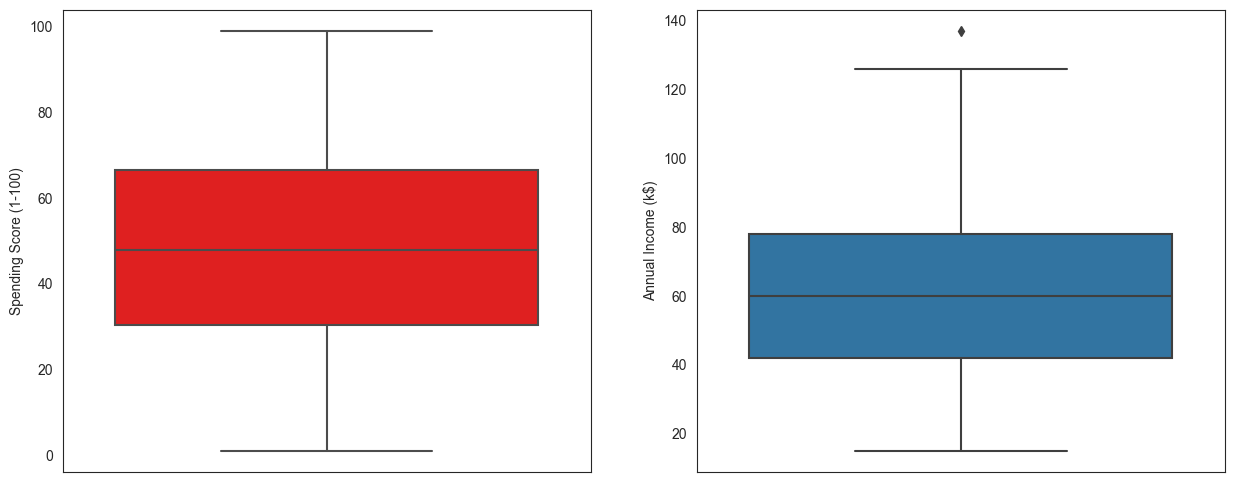

In [132]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

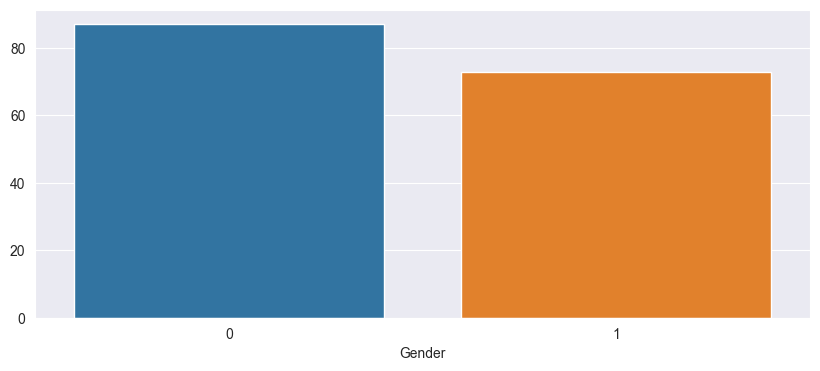

In [133]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

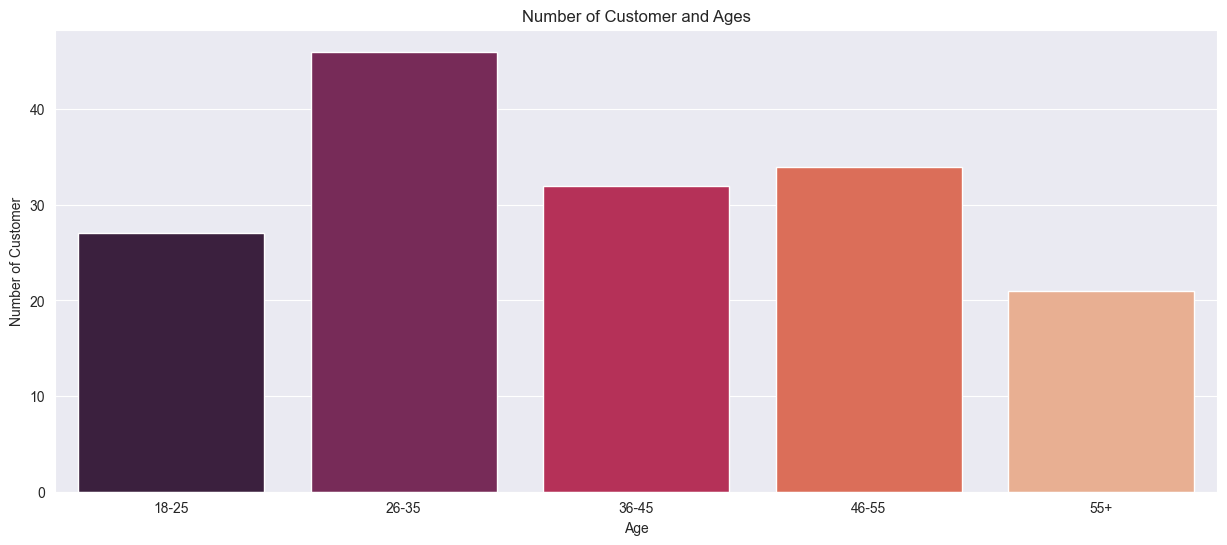

In [134]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

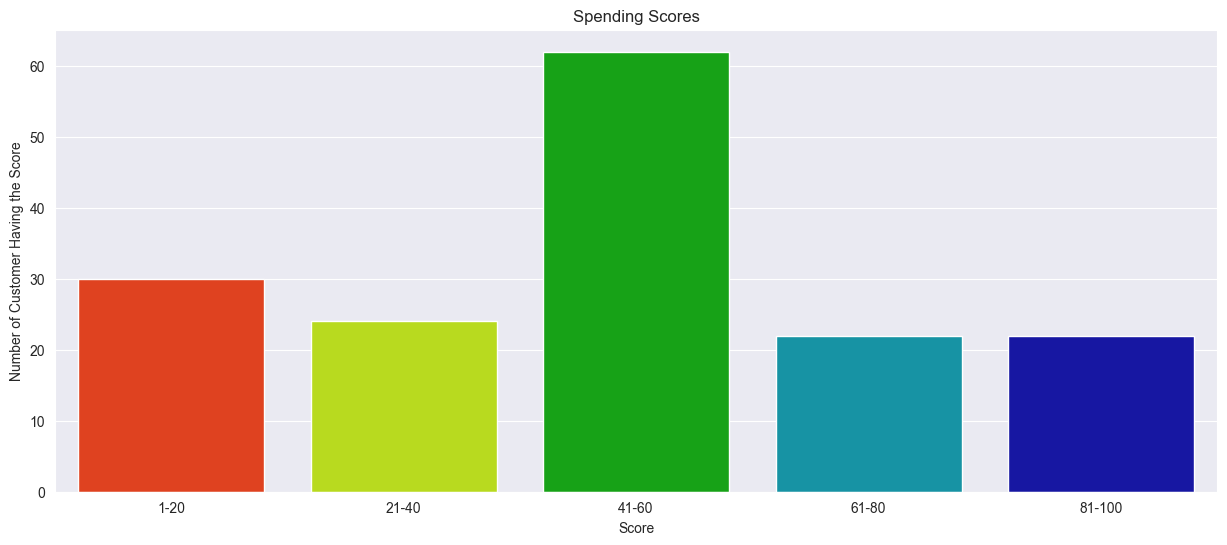

In [135]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

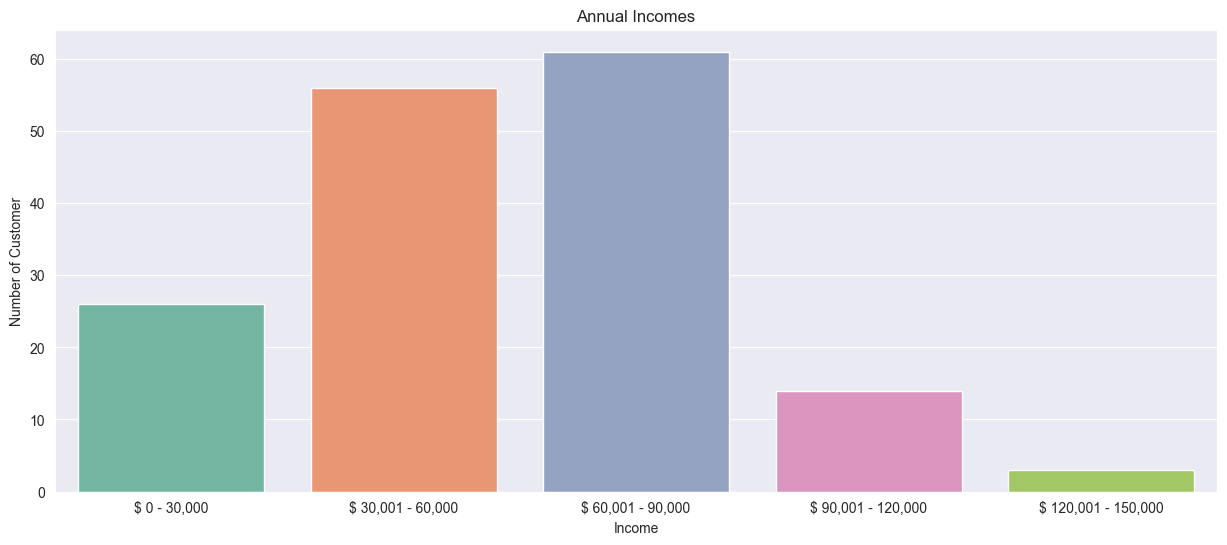

In [136]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

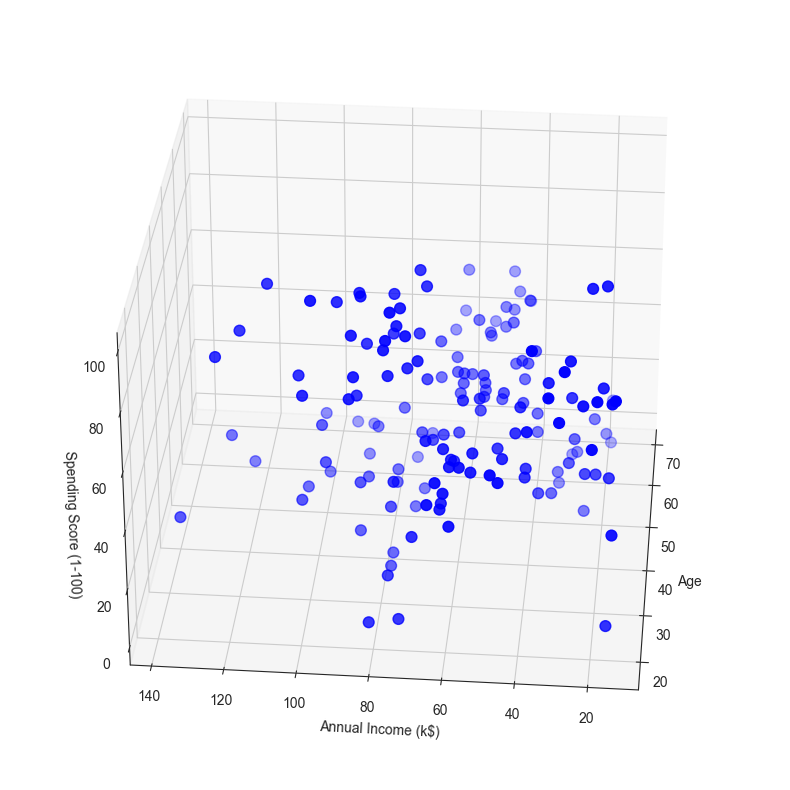

In [137]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

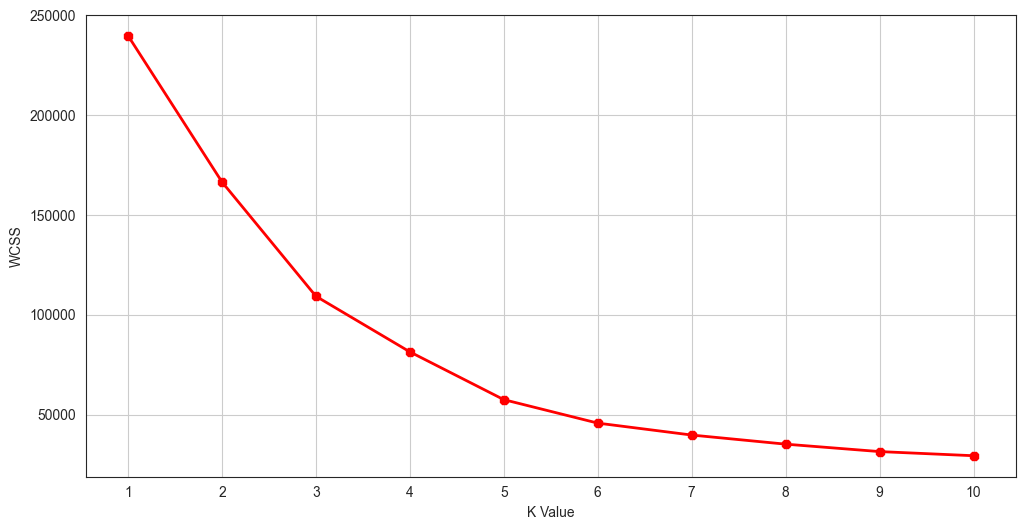

In [138]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


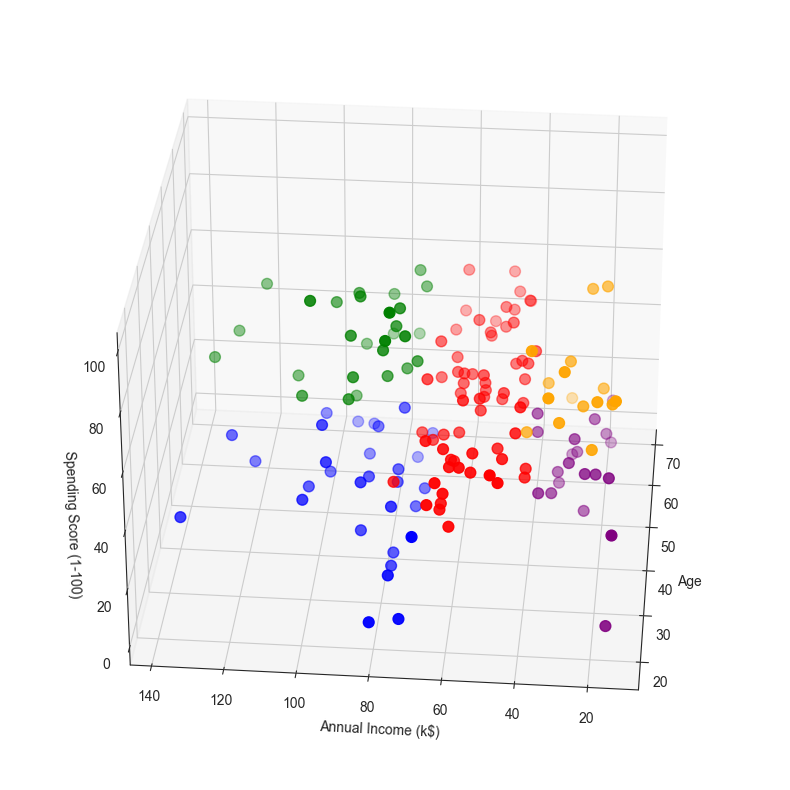

In [139]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [140]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(df)
# new_data = scaler.transform(new_data)

In [147]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Simulated changing data points
# data_stream = np.random.rand(100, 2)

# Initial clustering using MiniBatchKMeans
n_clusters = 5
batch_size = 10
km = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=0)
clusters = km.fit_predict(df[:batch_size])


# clusters = km.fit_predict(df.iloc[:,:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

TypeError: float() argument must be a string or a real number, not 'MiniBatchKMeans'

In [143]:
# Simulating new data points coming in
# new_data = np.random.rand(20, 2)

# Incremental update of clusters
km.partial_fit(new_data)

# Get cluster assignments for all data points
all_data = np.vstack((df, new_data))
all_cluster_assignments = kmeans.predict(all_data)

print("Cluster Assignments:")
print(all_cluster_assignments)


AttributeError: 'KMeans' object has no attribute 'partial_fit'

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Simulated changing data points
data_stream = np.random.rand(100, 2)

# Initial clustering using MiniBatchKMeans
n_clusters = 3
batch_size = 10
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=0)
kmeans.fit(data_stream[:batch_size])

# Simulating new data points coming in
new_data = np.random.rand(20, 2)

# Incremental update of clusters
kmeans.partial_fit(new_data)

# Get cluster assignments for all data points
all_data = np.vstack((data_stream, new_data))
all_cluster_assignments = kmeans.predict(all_data)

print("Cluster Assignments:")
print(all_cluster_assignments)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

# Assuming you have a pandas DataFrame named mall_data
X = data.values

# Split the dataset into old and new data
old_data, new_data = train_test_split(X, test_size=0.2, random_state=42)

# Initial clustering using KMeans
n_clusters = 5
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
kmeans.fit(old_data)
initial_labels = kmeans.predict(old_data)
initial_centers = kmeans.cluster_centers_

# Update clusters with new data
updated_labels = kmeans.predict(new_data)
kmeans.partial_fit(new_data)
updated_centers = kmeans.cluster_centers_

# Visualize the initial clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(old_data[:, 2], old_data[:, 3], c=initial_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(initial_centers[:, 2], initial_centers[:, 3], c='red', marker='X', s=100, label='Initial Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Initial Clustering')
plt.legend()

# Visualize the updated clustering with new data
plt.subplot(1, 2, 2)
plt.scatter(old_data[:, 2], old_data[:, 3], c=initial_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(new_data[:, 2], new_data[:, 3], c=updated_labels, cmap='viridis', marker='s', label='New Data', alpha=0.7)
plt.scatter(updated_centers[:, 2], updated_centers[:, 3], c='green', marker='^', s=100, label='Updated Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering with New Data')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'data' is not defined